<a id="0"></a>
 # Table of Contents  
1. [Introduction to OpenCV](#1)     

2. [Reading an Image](#2) 

3. [Examine the Image](#3) 

4. [Drawing Shapes](#4) 

    4.1 [Drawing a Line](#11)

    4.2 [Drawing a Rectangle](#12)
  
    4.3 [Drawing a Circle](#13)
  
    4.4 [Drawing a Ellipse](#14)
  
    4.5 [Drawing a Polygon](#15)
    
    4.6 [Putting the Text on the Image](#17)
    

5. [Saving the Image](#5) 

6. [Grayscaling](#6) 

7. [Thresholding, Binarization & Adaptive Thresholding](#7) 

8. [Arithmetic Operations on Images](#8)   
 
    8.1 [Image Addition](#18)

    8.2 [Image Subtraction](#19)

    8.3 [Bitwise Operations](#20)

9. [Image Enhancement Methods](#9)     

    9.1 [Smoothing with Gaussian Filter](#21)   

    9.2 [Noise Removal](#22)     

10. [Color Filtering](#10)  

<a id="1"></a>

# 1. What is OpenCV?


OpenCV or Open Source Computer Vision Library is an open source computer vision and machine learning library that supports a couple of progamming languages namely: Python, Java, C and C++. 


    

<a id="2"></a>

# 2. Reading the Image


Here is the sample image that we are going to use for this tutorial, which is labeled `apple.jpeg`.



In [ ]:
!ls

drive  sample_data


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Content_For_Trainees

/content/drive/MyDrive/Colab Notebooks/Content_For_Trainees


In [ ]:
# Importing Dependencies

import cv2
import numpy as np
from matplotlib import pyplot as plt

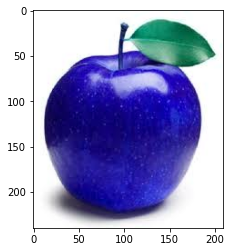

In [ ]:
image_path = "images/apple.jpeg"
img = cv2.imread(image_path)               #Read the image and store it into a variable
plt.imshow(img)                             #Ploting the image using matplotlib



Notice how the apple looks weird? 

This is because OpenCV utilize the BGR format as it was the popular format for camera manufacturer back in the day when it was written, and for historical reasons we have to live with it. Before we fix this in a second, let us first examine the `cv.imread()` function.

`cv.imread()` has two arguments:

1. Image Path
2. The 3 parameters that the image should be read. They can also be altneratively represented as integers:
    
    <b>-1</b><br>
    `cv.IMREAD_COLOR` (<b>Default Tag</b>) - neglects the image transparency, mostly for 8-bit images that don’t have the alpha channel.
    
    <b>0</b><br>`cv.IMREAD_GRAYSCALE` — responsible for loading our images in grayscale.
    
    <b>1</b><br>`cv.IMREAD_UNCHANGED` — loads an image using alpha channel.
    
Ok, now that we understand the image reading function, let's try to fix the weird colors. To do this, we are going to Convert it to RGB format using the `cvtColor()` function in OpenCV, using the `cv.COLOR_BGR2RGB` as the parameter.
    
    



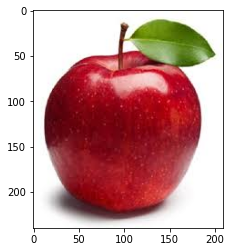

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Boom! 

There we go! We just successfully displayed our first image.

<a id="3"></a>
# 3. Examine the Image


<Br>Let's now close examine the img that we just manipulated.

In [ ]:
print("Image type: ", type(img_rgb))
print("Image data type: ", img_rgb.dtype)
print("Image shape: ", img_rgb.shape)

Image type:  <class 'numpy.ndarray'>
Image data type:  uint8
Image shape:  (240, 210, 3)


As we can see the image is a numpy n-th dimensional array with its shape in this case being `(240,210,3)`. This is because computers read images in term of pixels. Note that OpenCV stores the y pixels as rows, and x pixels as columns. So in this case image, this is a `240 x 210` picture. The `3` represent the BGR or RGB value inside of each pixel, expressed in form of an array. 


<a id="4"></a>

# 4. Drawing Shapes



<a id="11"></a>

### 4.1 Drawing a Line


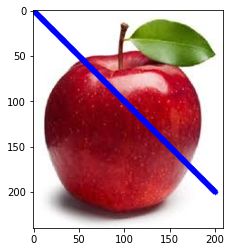

In [ ]:
line_img = img_rgb.copy()                           #Make a copy of the image
cv2.line(line_img,(0,0),(200,200),(0,0,255),5)       #Drawing a diagonal blue line with thickness of 5 px
plt.imshow(line_img)                                #show the image

There are 4 arguments in this tutorial for the cv.line function that you have to worry about, which will mutate the image variable. For more parameters, feel free to refer to the drawing documentation 
https://docs.opencv.org/3.4.1/d6/d6e/group__imgproc__draw.html


1. `img_rgb` , which in this case represents the image we would like to draw our line on
2. `(0,0)`, the starting location of our line with both `x` and `y` equals 0
3. `(200,200)`, the end location of our line also with both `x` and `y` equals 200
4. `((0,255,0),5)`, the color of our line `(0,255,0)` and the thickness of the line in `5` px


<a id="12"></a>
### 4.2 Drawing a rectangle



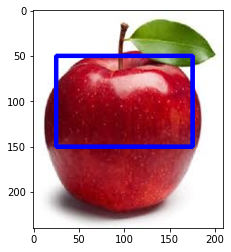

In [ ]:
rectangle_img = img_rgb.copy()
cv2.rectangle(rectangle_img,(25,50),(175,150),(0,0,255),3)
plt.imshow(rectangle_img)

For the cv.rectangle method, here are the parameters meant. 

1. `img_rgb`, the image we would like to draw our rectangle on
2. `(25,50)`, pt1, vertex of the rectangle
3. `(175,150)`, pt2, vertext of the rectangle of the pt1
4. `(0,0,255)`, the RGB value of our rectangle color
5. `3` the thickness of our rectangle in pixels


<a id="13"></a>
### 4.3 Drawing a circle



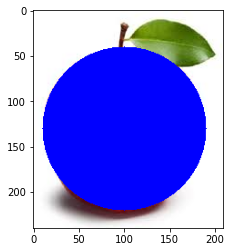

In [ ]:
circle_img = img_rgb.copy()
cv2.circle(circle_img,(100,130), 90, (0,0,255), -1)
plt.imshow(circle_img)

1. `img_rgb`, the image we would like to draw our rectangle on
2.  `(100,130)`, center location of where the circle starts
3. `90`, the radius of the cricle in pixels 
4. `(0,0,255)`, the RGB value of our rectangle color, in this case it is blue
5. `-1` thickness of our circle, if NEGATIVE, then the circle is going to be filled


<a id="14"></a>
### 4.4 Drawing a Ellipse


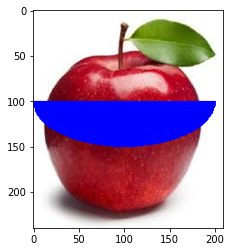

In [ ]:
ellipse_img = img_rgb.copy()
cv2.ellipse(ellipse_img,(100,100),(100,50),0,0,180,(0,0,255),-1)
plt.imshow(ellipse_img)

1. `img_rgb`, the image we would like to draw our ellipse on
2. `(100,100)`, center of our Ellipse
3. `(100,50)`, axes lengths (major axis length, minor axis length)
4. `0,0,180` , represents the ellipse rotation angle 0 , start angle 0, and end angel 180 
5. `(0,0,255)` represents the color of our ellipse, which is blue in this case
6.  `-1` the thickness of our rectangle in pixels, again, -1 meant that the ellipse will be filled instead of displaying a silhouette with x amount of pixels

<a id="15"></a>
### 4.5 Drawing a Polygon



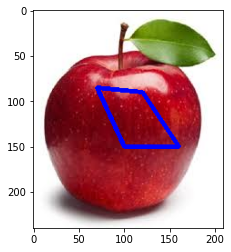

In [ ]:
polygon_img = img_rgb.copy()
pts = np.array([[70,85],[100,150],[160,150],[120,90]], np.int32)      #Drawing our Polygon
pts = pts.reshape((-1,1,2))                               #Reshaping our Polygon so it is
cv2.polylines(polygon_img,[pts],True,(0,0,255),3)
plt.imshow(polygon_img)

cv.polylines also have 4 params in this tutorial.

In the beginning, we have to first give the 4 coordinates that we would like for the points of our array to be. Then, we shape those points into an array of shape ROWSx1x2 where ROWS are number of vertices.

1. `polygon_img`, the image that we would to manipulate on.
2. `[pts]`, the coordinates of the 4 vertices that we draw on the picture
3. `True`, boolean value that indicates whether the shape is enclosed or not. if closed, the funciton draws from the last vertex to the first.
4. `(0,0,255)`, the color of the polygon, which in this case is blue.
5. `3`, thickness of the polygon in px

<a id="17"></a>
### 4.7 Putting Text on Image

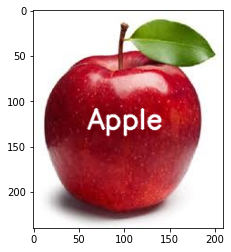

In [ ]:
text_img = img_rgb.copy()
font = cv2.FONT_HERSHEY_SIMPLEX #Setting the Font
textcolor = (255,255,255)
cv2.putText(text_img,'Apple',(60,130), font, 1,textcolor,2,cv2.LINE_AA)
plt.imshow(text_img)


Here are the functions for the cv.putText parameter:

1. `text_img`, the image where we are going to do our image manipulation on
2. `'Apple'`, the text string that you would like to put onto the image
3. `(60,130)`, the bottom-left corner of the text
4. `font`, in this case we set it as FONT_HERSHEY_SIMPLEX, to see more font options, check out https://docs.opencv.org/3.4.1/d0/de1/group__core.html#ga0f9314ea6e35f99bb23f29567fc16e11
5. `1`, the font scale, in this case is 1
6. `(255,255,255)`, the color of the text in rgb value
7. `2`,thickness of the text
8. `cv.LINE_AA`, line types, check it out here https://docs.opencv.org/3.4.1/d0/de1/group__core.html#gaf076ef45de481ac96e0ab3dc2c29a777

<a id="5"></a>
# 5. Saving the Image
Finally you save the Image using the cv.imwrite function. We can simpy demonstrate by saving the apple image with the text.



In [ ]:
cv2.imwrite("Apple_with_Text.jpg",text_img)

True

<a id="6"></a>
# 6. Grayscaling
Grayscaling is process by which an image is converted from a full color to shades of grey (black & white)



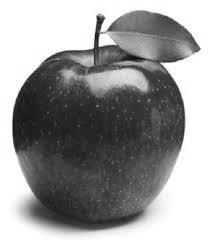

In [ ]:
from google.colab.patches import cv2_imshow

# Load our input image
image = cv2.imread('images/apple.jpeg')
# cv2_imshow(image)

# We use cvtColor, to convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

<a id="7"></a>
# 7. Thresholding, Binarization & Adaptive Thresholding

In thresholding, we convert a grey scale image to it's binary form

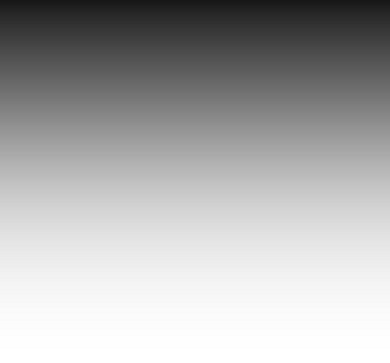

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load our image as greyscale 
image = cv2.imread('images/gradient.jpg',0)
# cv2.imshow('Original', image)
cv2_imshow(image)

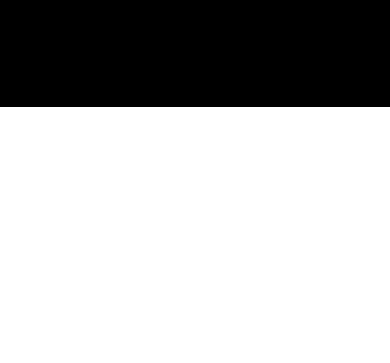

In [ ]:
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
# cv2.imshow('1 Threshold Binary', thresh1)
cv2_imshow(thresh1)

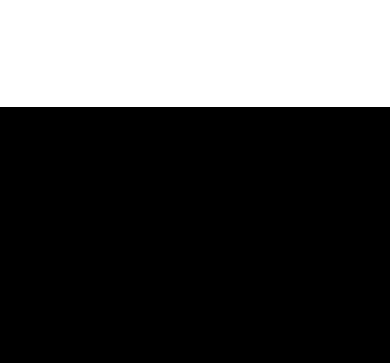

In [ ]:
# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
# cv2.imshow('2 Threshold Binary Inverse', thresh2)
cv2_imshow(thresh2)

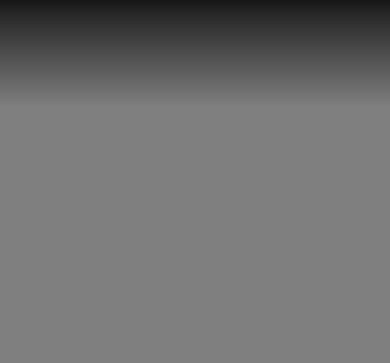

In [ ]:
# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
# cv2.imshow('3 THRESH TRUNC', thresh3)
cv2_imshow(thresh3)

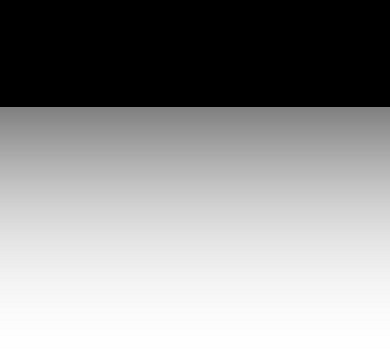

In [ ]:
# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
# cv2.imshow('4 THRESH TOZERO', thresh4)
cv2_imshow(thresh4)

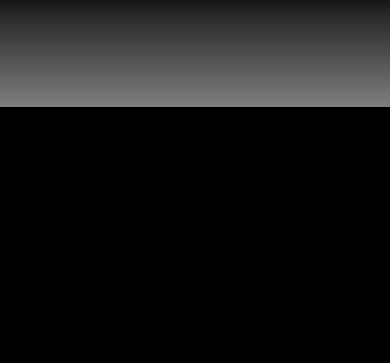

In [ ]:
# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
# cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2_imshow(thresh5)

Is there a better way off thresholding?
The biggest downfall of those simple threshold methods is that we need to provide the threshold value (i.e. the 127 value we used previously).

What if there was a smarter way of doing this?
There is with, Adaptive thresholding.

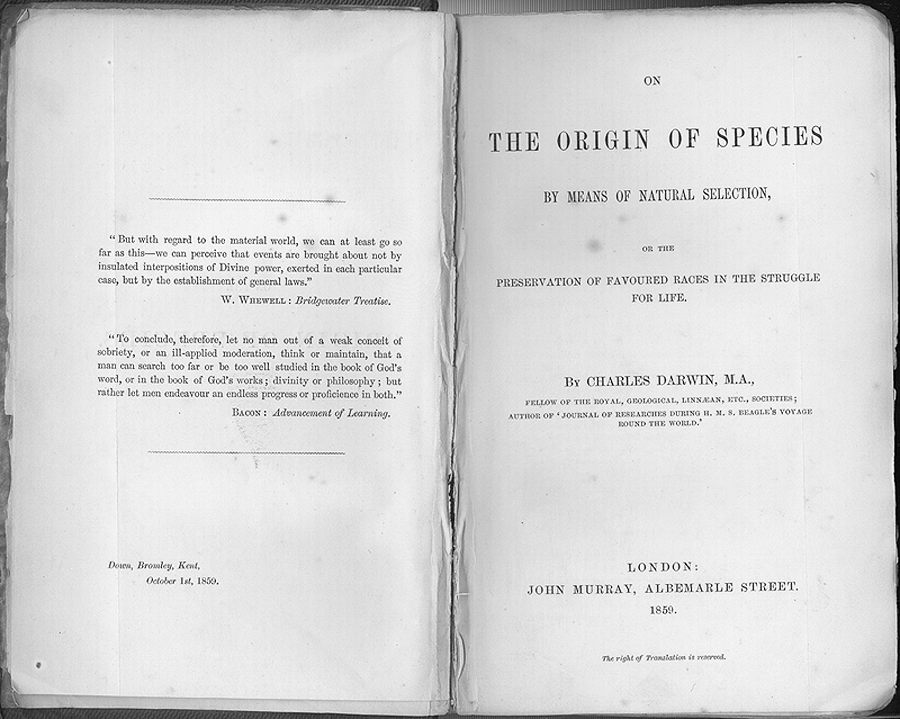

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load our new image
image = cv2.imread('images/Origin_of_Species.jpg', 0)
cv2_imshow(image)

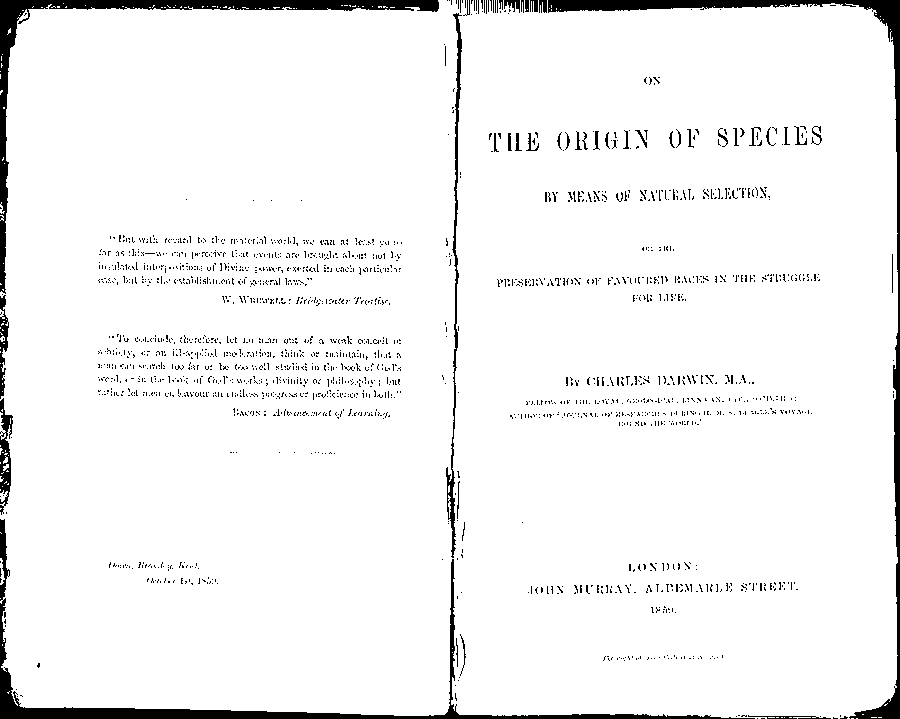

In [ ]:
# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)

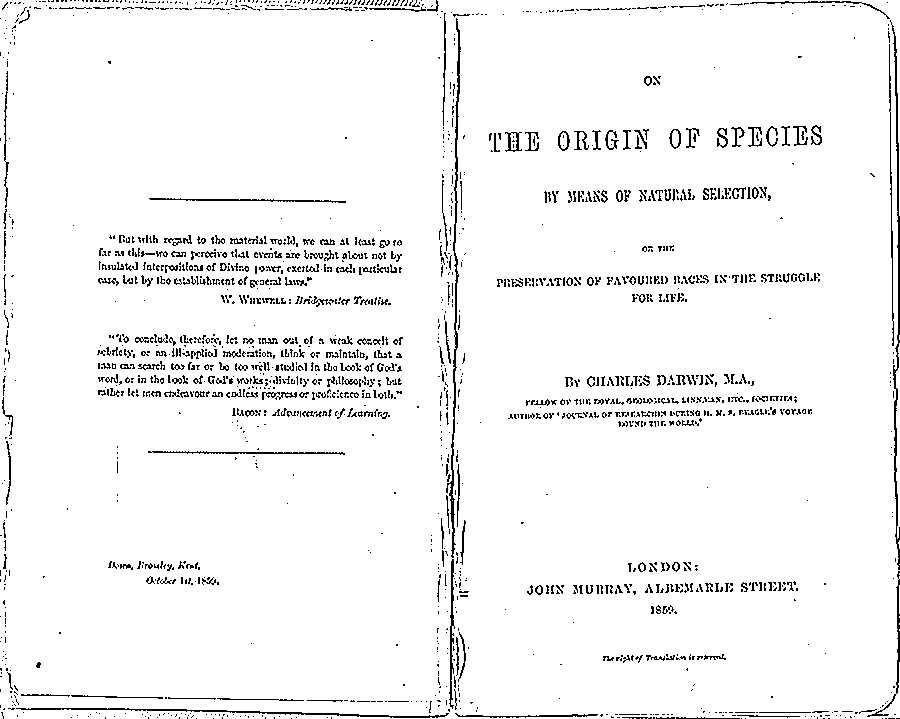

In [ ]:
# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
cv2_imshow(thresh)  #Adaptive Mean Thresholding

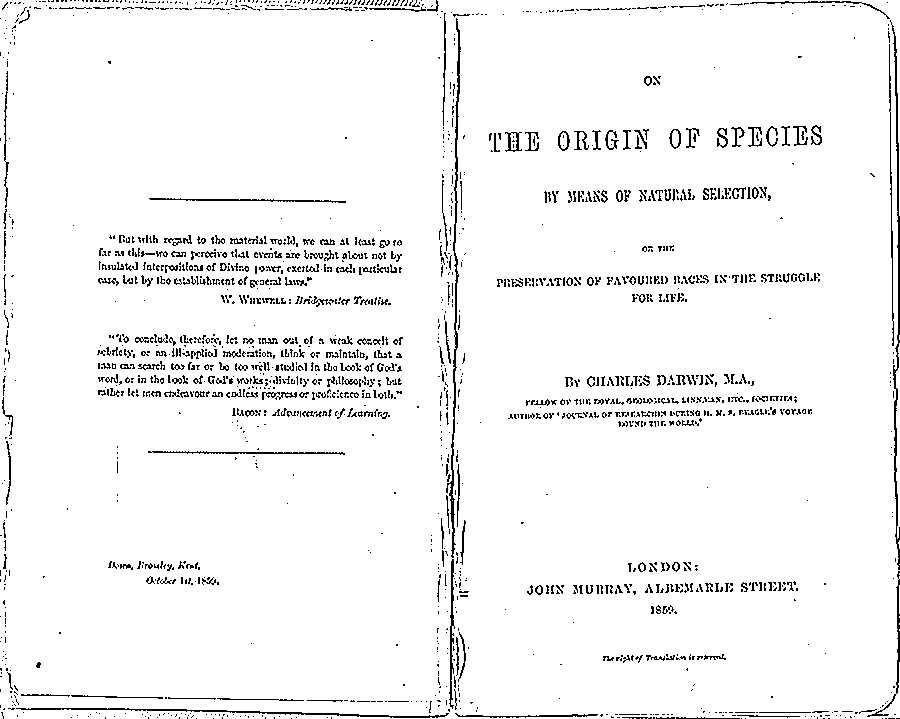

In [ ]:
_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh)  #Otsu's Thresholding

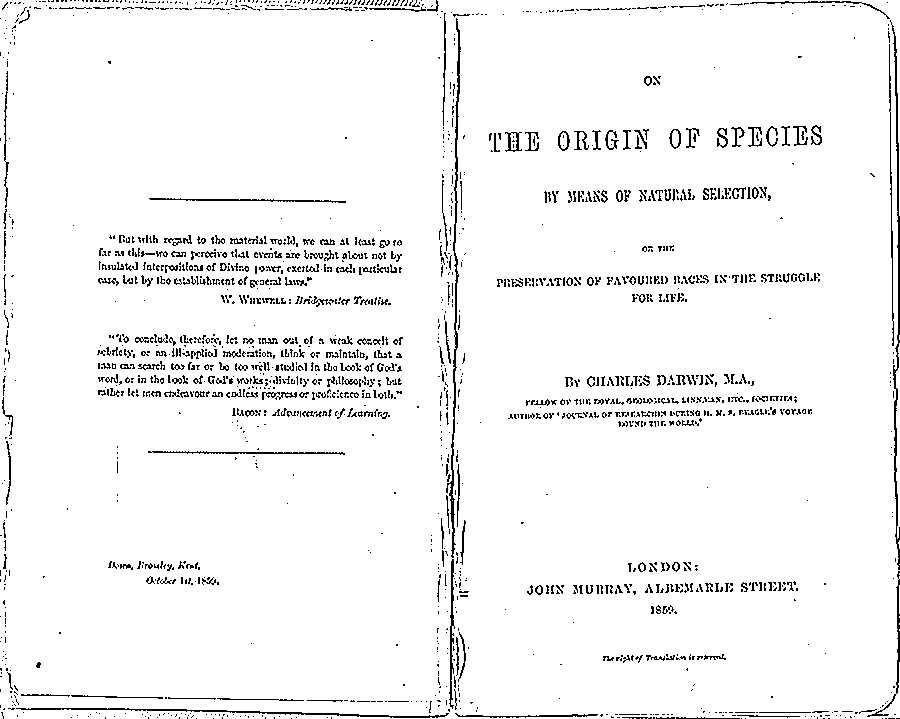

In [ ]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(thresh)  #Guassian Otsu's Thresholding

<a id="8"></a>
# 8. Arithmetic Operations on Images

In [ ]:
# Importing the Libraries
import cv2
import matplotlib.pyplot as plt

<a id="18"></a>
## 8.1 Image Addition


*   Two images can be added through a pixel-wise operation using the cv2.addWeighted function.
*   The two images should be of same depth and type, or second image can just be a scalar value.




In [ ]:
# Loading the Images
image1 = cv2.imread('images/road.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/lenna.png', cv2.IMREAD_GRAYSCALE)
print('Image 1 Shape:', image1.shape)
print('Image 2 Shape:', image2.shape)

Image 1 Shape: (256, 256)
Image 2 Shape: (256, 256)


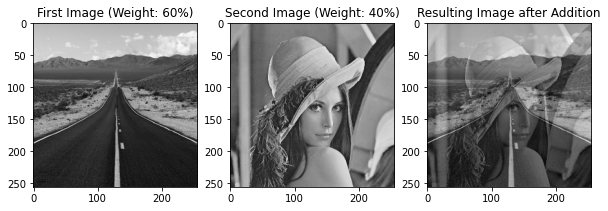

In [ ]:
# Performing Weighted Addition & Displaying Results
res = cv2.addWeighted(image1, 0.6, image2, 0.4, 0)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(image1, cmap='gray')
ax1.title.set_text('First Image (Weight: 60%)')
ax2.imshow(image2, cmap='gray')
ax2.title.set_text('Second Image (Weight: 40%)')
ax3.imshow(res, cmap='gray')
ax3.title.set_text('Resulting Image after Addition')
plt.show()

<a id="19"></a>
## 8.2 Image Subtraction

* Just like addition, subtraction of the pixel values in two images can be performed.

* For this, the cv2.subtract function is used which takes two images as arguments.

* The images should be of equal size and depth.

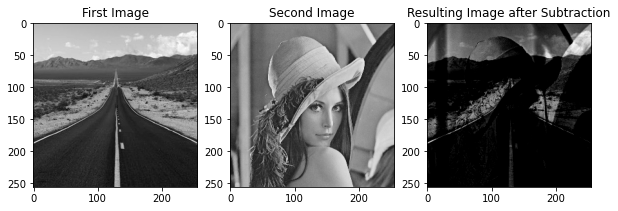

In [ ]:
# Performing Subtraction & Displaying Results
res = cv2.subtract(image1, image2)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.imshow(image1, cmap='gray')
ax1.title.set_text('First Image')
ax2.imshow(image2, cmap='gray')
ax2.title.set_text('Second Image')
ax3.imshow(res, cmap='gray')
ax3.title.set_text('Resulting Image after Subtraction')
plt.show()

<a id="20"></a>
## 8.3 Bitwise Operations

* Bitwise includes bitwise AND, OR, NOT and XOR operations. They are highly useful while extracting any part of the image, defining and working with non-rectangular ROI etc.

* In the following demonstration, the OpenCV logo is made transparent and blended onto another image using Bitwise operations.

In [ ]:
# Loading the Images
image1 = cv2.imread('images/peppers.png')
image2 = cv2.imread('images/opencv_logo.png')

In [ ]:
# Selecting ROI of first image with respect to the size of the second image
rows, cols, channels = image2.shape
roi = image1[0:rows, 0:cols]  # From top-left

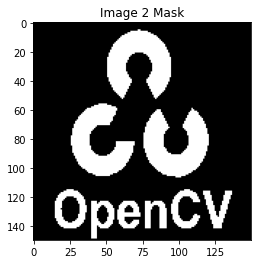

In [ ]:
# Using thresholding to create mask of Image 2
gray_image = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
plt.title('Image 2 Mask')
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
# Masking Only Required Regions using Bitwise OR Operation
image1_bg = cv2.bitwise_or(roi, roi, mask = mask_inv)
image2_fg = cv2.bitwise_or(image2, image2, mask = mask)

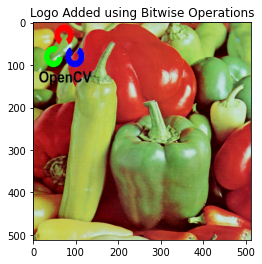

In [ ]:
# Adding the Images & Displaying Result
dst = cv2.add(image1_bg,image2_fg)
image1_added = image1
image1_added[0:rows, 0:cols ] = dst
image1_added = cv2.cvtColor(image1_added, cv2.COLOR_BGR2RGB) # For matplotlib imshow
plt.title('Logo Added using Bitwise Operations')
plt.imshow(image1_added)
plt.show()

<a id="9"></a>
# 9. Image Enhancement Methods

Original Image Shape: (256, 256)


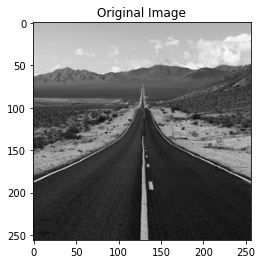

In [ ]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('images/road.bmp', cv2.IMREAD_GRAYSCALE)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
print('Original Image Shape:', image.shape)

<a id="21"></a>
## 9.1 Smoothing with Gaussian Filter

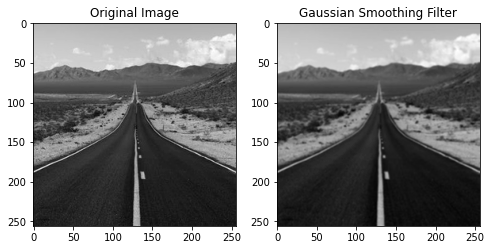

In [ ]:
gaussian_filter = cv2.GaussianBlur(image, (3,3), 0)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(gaussian_filter, cmap='gray')
ax2.title.set_text('Gaussian Smoothing Filter')

<a id="22"></a>
## 9.2 Noise Removal

* Denoising of an image refers to the process of reconstruction of a signal from noisy images.

* Denoising is done to remove unwanted noise from image to analyze it in better form.

* Denoising is achieved using the cv2.fastNlMeansDenoisingColored function.

In [ ]:
# Adding Noise to Image
noise = np.zeros(image.shape, np.uint8)
cv2.randn(noise, mean=0, stddev=30)
noisy = cv2.add(image, noise)

# Noise Removal
colored = cv2.cvtColor(noisy, cv2.COLOR_GRAY2BGR)
denoised = cv2.fastNlMeansDenoisingColored(colored, None, 10, 10, 7, 15)

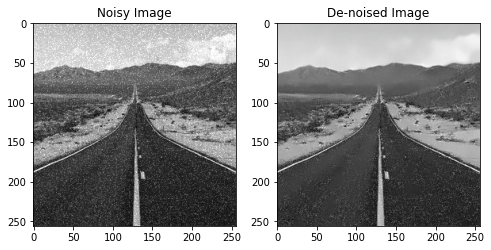

In [ ]:
# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(noisy, cmap='gray')
ax1.title.set_text('Noisy Image')
ax2.imshow(denoised, cmap='gray')
ax2.title.set_text('De-noised Image')

<a id="10"></a>
# 10. Color Filtering

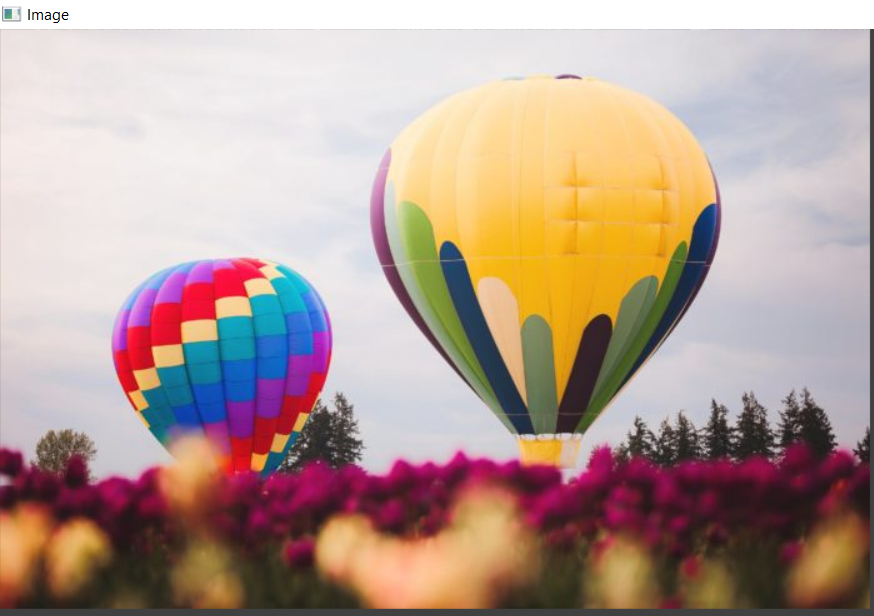

In [ ]:
img = cv2.imread("images/balloon.png")
# plt.imshow(img)
cv2_imshow(img)

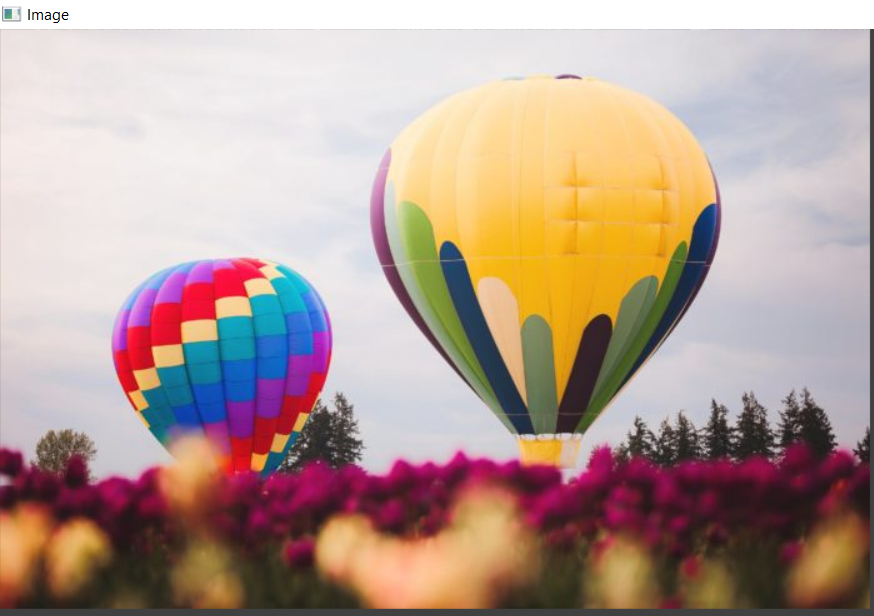

In [ ]:
# cv2.imshow('Image',img)  # Showing The Sample Test Image
cv2_imshow(img)  # Showing The Sample Test Image

In [ ]:
print(img.shape)

(616, 874, 3)


Converting BGR to HSV color space.

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Threshold of Blue in HSV color space.

In [ ]:
lower = np.array([60, 35, 140])
upper = np.array([180, 255, 255])
mask = cv2.inRange(hsv, lower, upper)

The black region in the masked area has the value of zero, so when we multiply the mask with the original image, it removes all non-blue regions

Text(0.5, 1.0, 'Third')

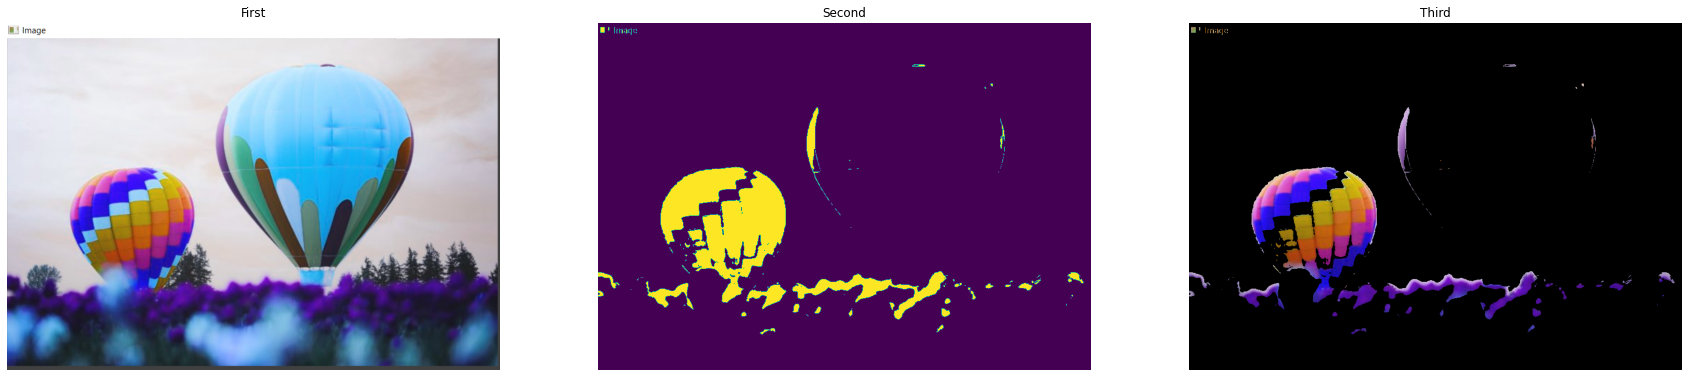

In [ ]:
result = cv2.bitwise_and(img, img, mask = mask)
fig= plt.figure(figsize=(30, 30))
fig.add_subplot(1, 3, 1)
# showing image
plt.imshow(img)
plt.axis('off')
plt.title("First")
# Adds a subplot at the 2nd position
fig.add_subplot(1, 3, 2)
  
# showing image
plt.imshow(mask)
plt.axis('off')
plt.title("Second")
fig.add_subplot(1, 3, 3)
# showing image
plt.imshow(result)
plt.axis('off')
plt.title("Third")